In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
import torch


spatial_mlp_mse = torch.load('samples/opensora_plan/skip_mse/0_spatial_mlp_mse.pt')

print(spatial_mlp_mse)

{891: [(0, 1.170029850783294e-08), (1, 1.4664981051737414e-07), (2, 1.4695350500915083e-06), (3, 2.707513999666844e-07), (4, 1.1242703834568601e-07), (5, 8.918129168478117e-08), (6, 2.183307259429057e-07), (7, 1.2775228697137209e-07), (8, 1.1121361609411906e-07), (9, 1.4200431053268403e-07), (10, 1.4844135876046494e-07), (11, 1.5457160884579935e-07), (12, 1.8036662652320956e-07), (13, 1.8124090672699822e-07), (14, 4.102455477550393e-07), (15, 7.230114533740561e-07), (16, 2.367523848079145e-06), (17, 4.3753030354309885e-07), (18, 9.407068546352093e-07), (19, 6.590389034499822e-07), (20, 7.476330097233586e-07), (21, 1.0722832257670234e-06), (22, 1.288203634430829e-06), (23, 1.0412934443593258e-06), (24, 2.9654900117748184e-06), (25, 4.910605639452115e-06), (26, 5.683994459104724e-06), (27, 2.874454003176652e-05)], 888: [(0, 1.0917599269077982e-08), (1, 1.2438955820925912e-07), (2, 1.233372699971369e-06), (3, 2.3288937711640756e-07), (4, 1.0479745071734214e-07), (5, 8.26821136001854e-08),

samples/opensora_plan/skip_mse/0_spatial_mlp_mse.pt


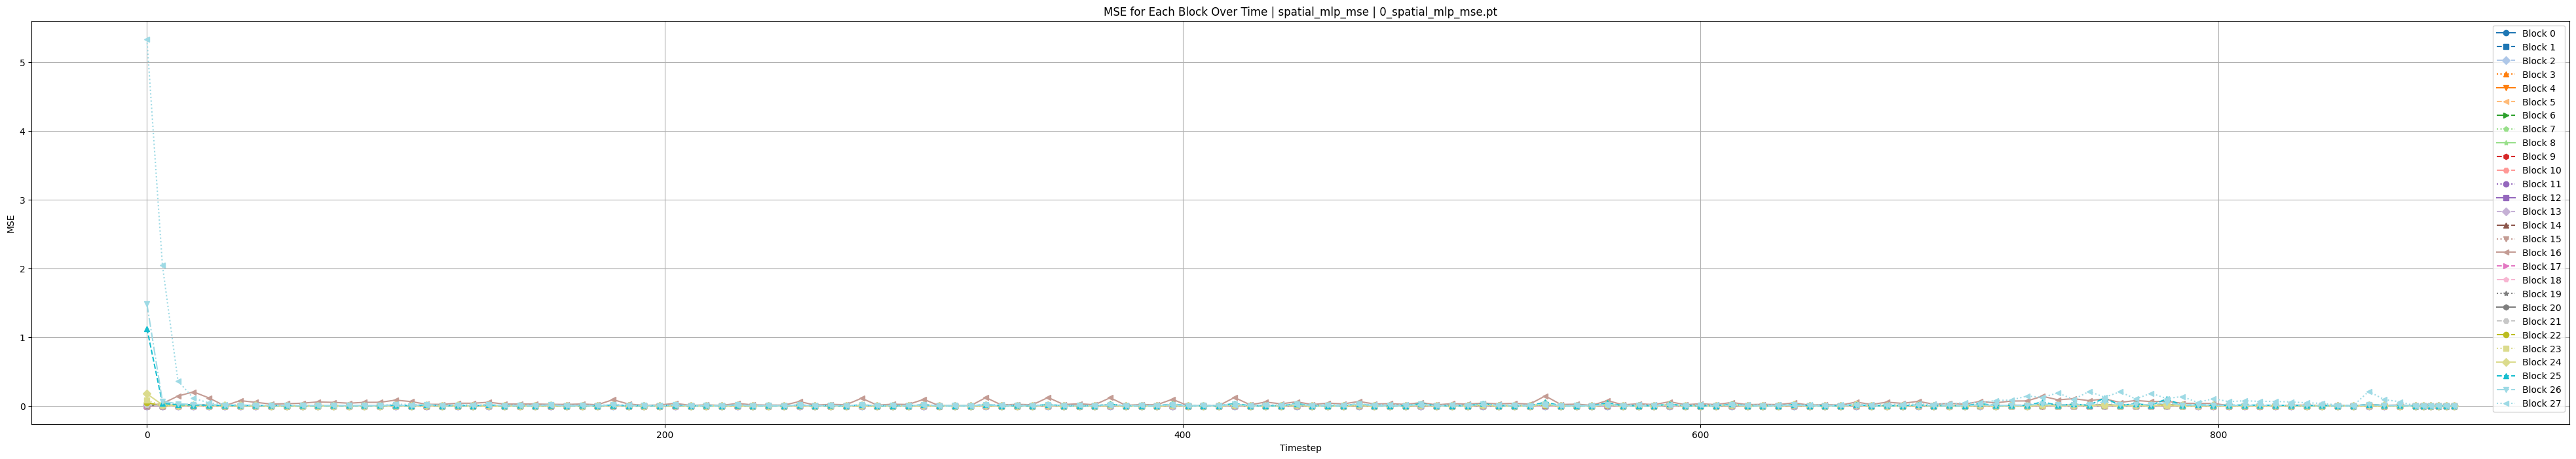

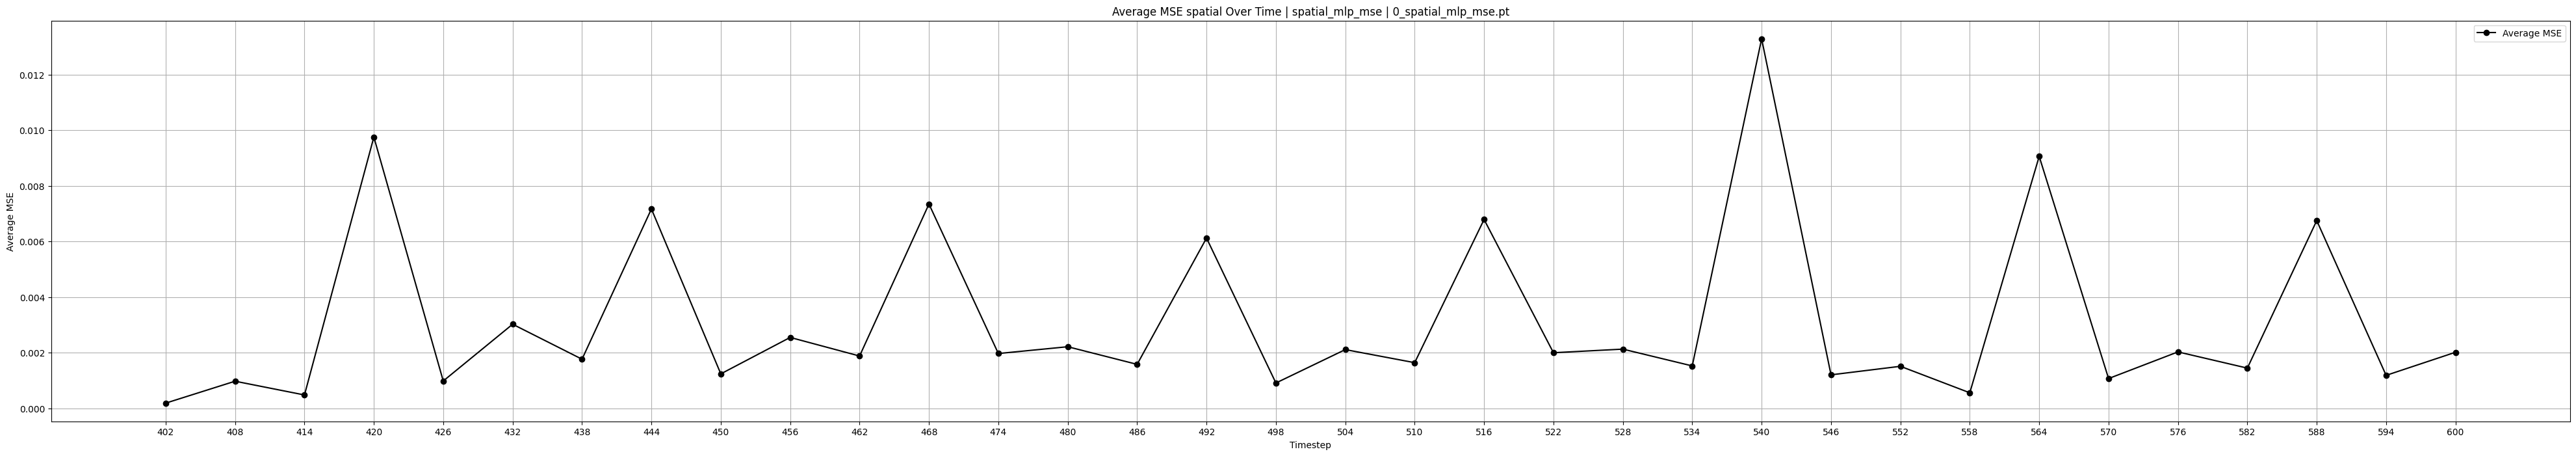

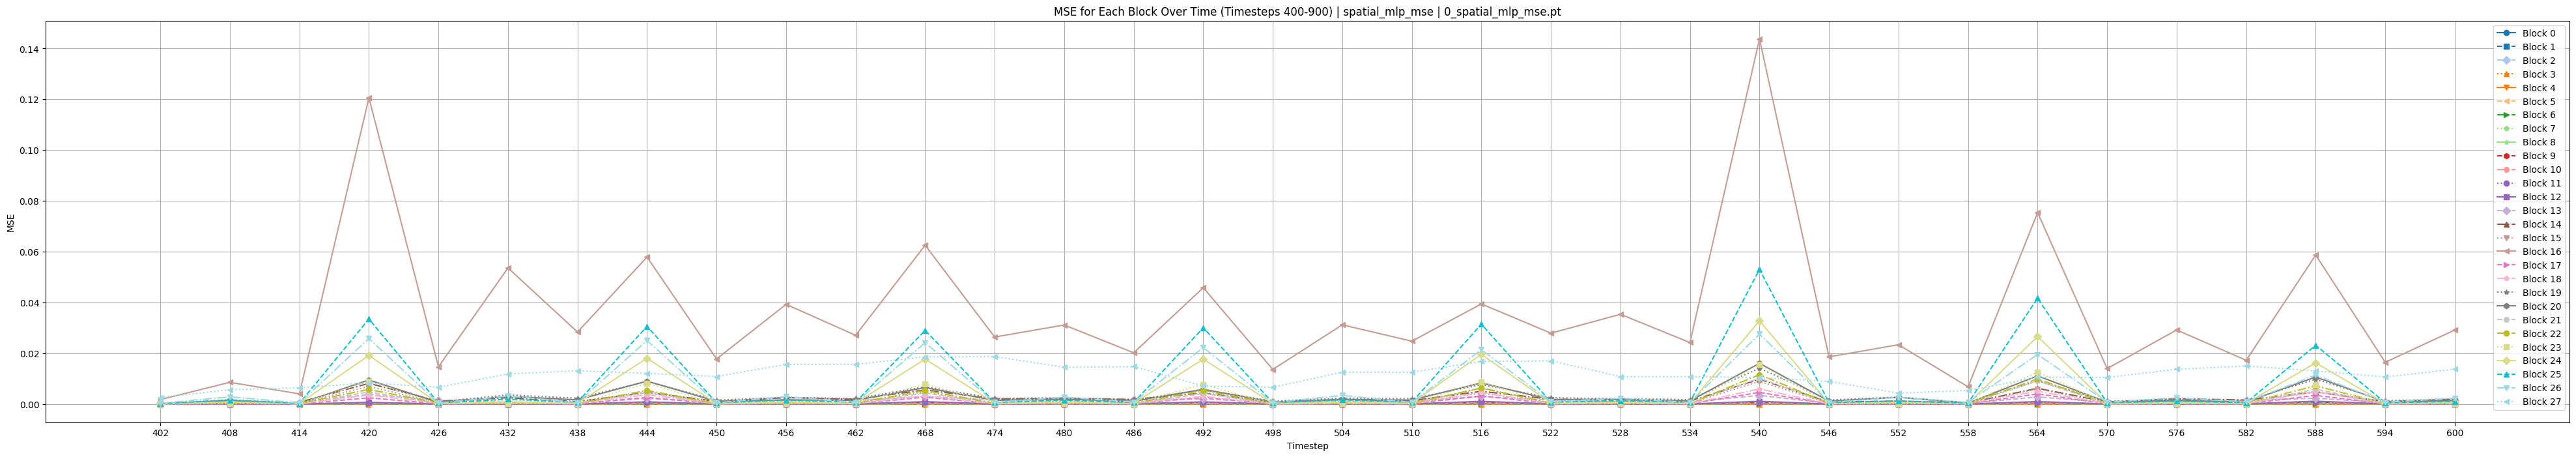

In [13]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import collections

mse_dirs = ['samples/opensora_plan/skip_mse/0_spatial_mlp_mse.pt']

# Load the data
def visual(dir):
    spatial_mlp_mse = torch.load(dir)
    prompt = dir.split('/')[-1].split('_0000')[0]


    # Organize data by block and timestep
    block_mse = collections.defaultdict(list)
    timesteps = sorted(spatial_mlp_mse.keys())

    for timestep in timesteps:
        for block_id, mse in spatial_mlp_mse[timestep]:
            block_mse[block_id].append((timestep, mse))

    # Define different styles for better distinction
    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H']
    colors = plt.get_cmap('tab20', len(block_mse))

    # Plot MSE for each block over time
    plt.figure(figsize=(50, 8))
    for idx, (block_id, mse_data) in enumerate(block_mse.items()):
        mse_data = sorted(mse_data)
        timesteps, mses = zip(*mse_data)
        plt.plot(timesteps, mses, label=f'Block {block_id}', linestyle=line_styles[idx % len(line_styles)],
                marker=markers[idx % len(markers)], color=colors(idx))

    plt.xlabel('Timestep')
    plt.ylabel('MSE')
    plt.title(f'MSE for Each Block Over Time | spatial_mlp_mse | {prompt}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate and plot average MSE over time
    average_mse = []
    filter_t = []
    for timestep in timesteps:
        if 400 <= timestep <= 600:
            filter_t.append(timestep)
            mse_values = [mse for _, mse in spatial_mlp_mse[timestep]]
            average_mse.append(np.mean(mse_values))

    plt.figure(figsize=(50, 8))
    plt.plot(filter_t, average_mse, label='Average MSE', color='black', marker='o')
    plt.xticks(filter_t)
    plt.xlabel('Timestep')
    plt.ylabel('Average MSE')
    plt.title(f'Average MSE spatial Over Time | spatial_mlp_mse | {prompt}')
    plt.legend()
    plt.grid(True)
    plt.show()


    all_timesteps = set()
    plt.figure(figsize=(50, 8))
    for idx, (block_id, mse_data) in enumerate(block_mse.items()):
        mse_data = sorted(mse_data)
        filtered_mse_data = [(t, mse) for t, mse in mse_data if 400 <= t <= 600]
        if filtered_mse_data:
            timesteps, mses = zip(*filtered_mse_data)
            all_timesteps.update(timesteps)  # Collecting all unique timesteps
            plt.plot(timesteps, mses, label=f'Block {block_id}', linestyle=line_styles[idx % len(line_styles)],
                    marker=markers[idx % len(markers)], color=colors(idx))

    plt.xlabel('Timestep')
    plt.ylabel('MSE')
    plt.title(f'MSE for Each Block Over Time (Timesteps 400-900) | spatial_mlp_mse | {prompt}')
    plt.legend()
    plt.grid(True)

    plt.xticks(sorted(all_timesteps))

    plt.show()



for dir in mse_dirs:
    print(dir)
    print('=============================')
    print('=============================')
    print('=============================')
    visual(dir)